# Name:Deepak Dwivedi
#ID: 11920001


In [3]:
# Setting up the path
import os
print(os.getcwd())
os.chdir("C:\\Users\\Dwiv2\\OneDrive\\Desktop\\Assignment\\Unsupervised learning")
print(os.getcwd())

C:\Users\Dwiv2
C:\Users\Dwiv2\OneDrive\Desktop\Assignment\Unsupervised learning


In [ ]:
# loading required modules
import pandas as pd
from matplotlib import pyplot as plt

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Question1:

In [7]:
# reading IRIS dataframe

iris_df=pd.read_csv("Iris.csv")


(150, 6)
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212BA111FC8>,
      dtype=object)

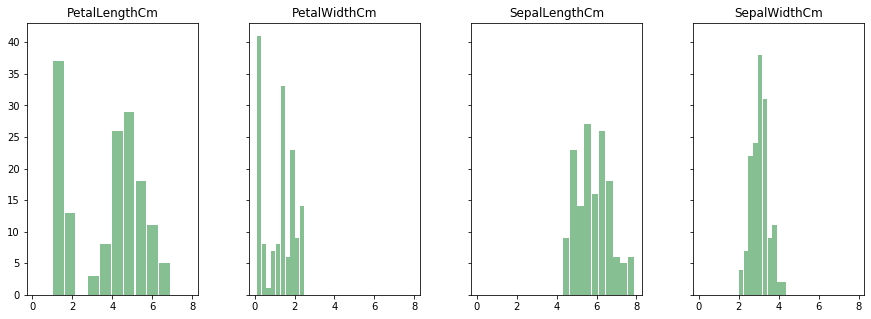

In [37]:
print(iris_df.shape)
# 150,6

print(iris_df.dtypes)

# selecting  4 required column
iris_df.hist(column=list(iris_df.columns)[1:5],bins=10, grid=False, figsize=(15,5), sharex=True,sharey=True, layout=(1,4), color='#86bf91', zorder=2, rwidth=0.9)


0
1
2
3


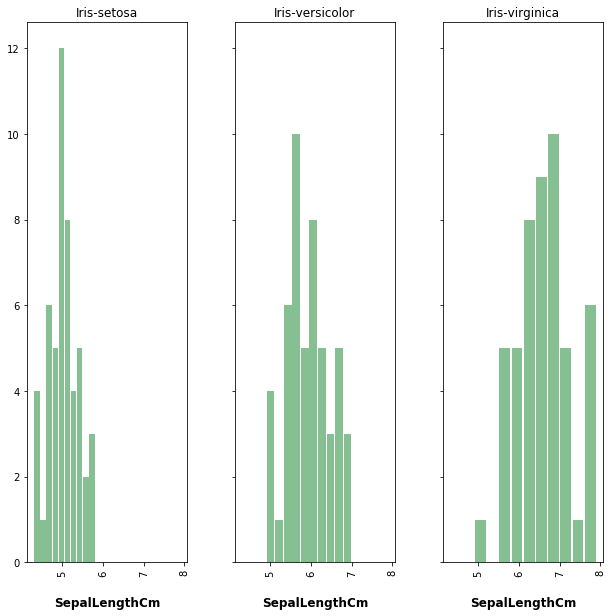

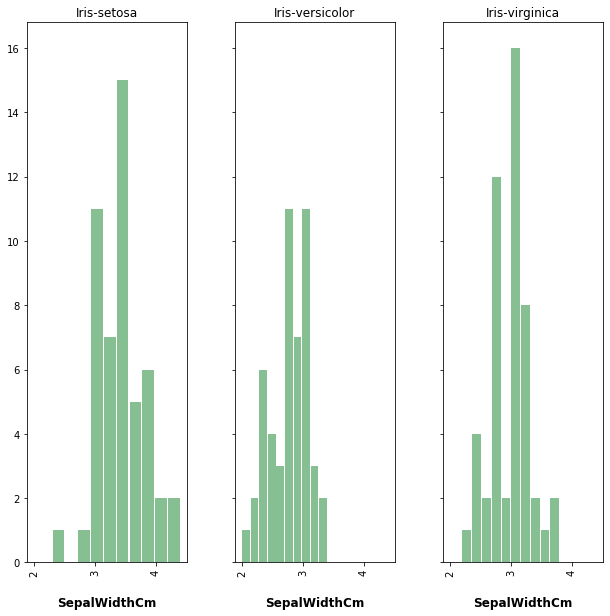

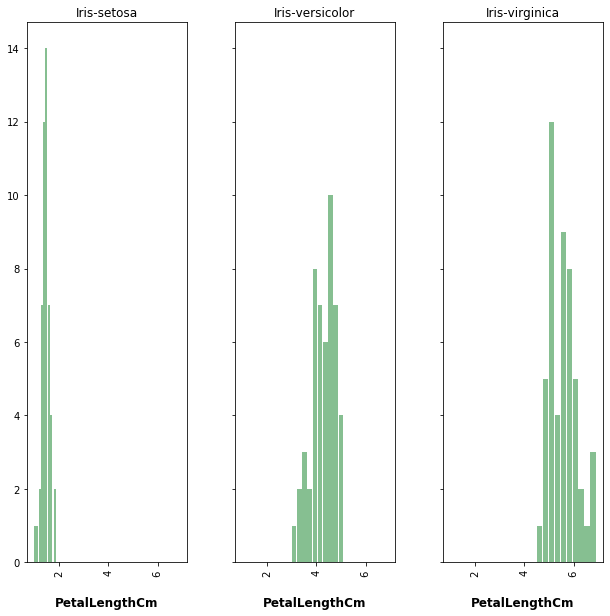

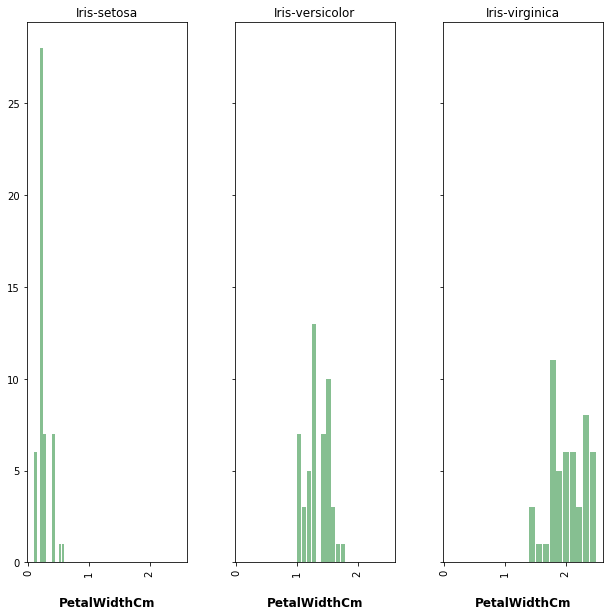

In [120]:
col=list(iris_df.columns)[1:5]

for i in range(len(col)):
    ax=iris_df.hist(column= iris_df.columns[i+1],bins=10, grid=True, by='Species',figsize=(10,10),sharex=True,sharey=True, layout=(1,3), color='#86bf91',zorder=2, rwidth=0.9)
    j=col[i]
    k="iris"+str(i)+".png"
    for i,x in enumerate(ax):
       # Set x-axis label
        x.set_xlabel(j, labelpad=20, weight='bold', size=12)
        fig = x.get_figure()
        fig.savefig(k)

        
#Petal Length Cm

In [ ]:
 # Petal Width will be best to descriminate the classes

# Question2

In [121]:
# importing required files

boston=pd.read_csv("training.csv")

In [123]:
print(boston.shape)
#(250000, 33)

# picking float datatype
ck=pd.DataFrame(boston.dtypes)

# selecting float
req=ck[ck[0]=="float64"]
req_col=list(req.index)

(250000, 33)


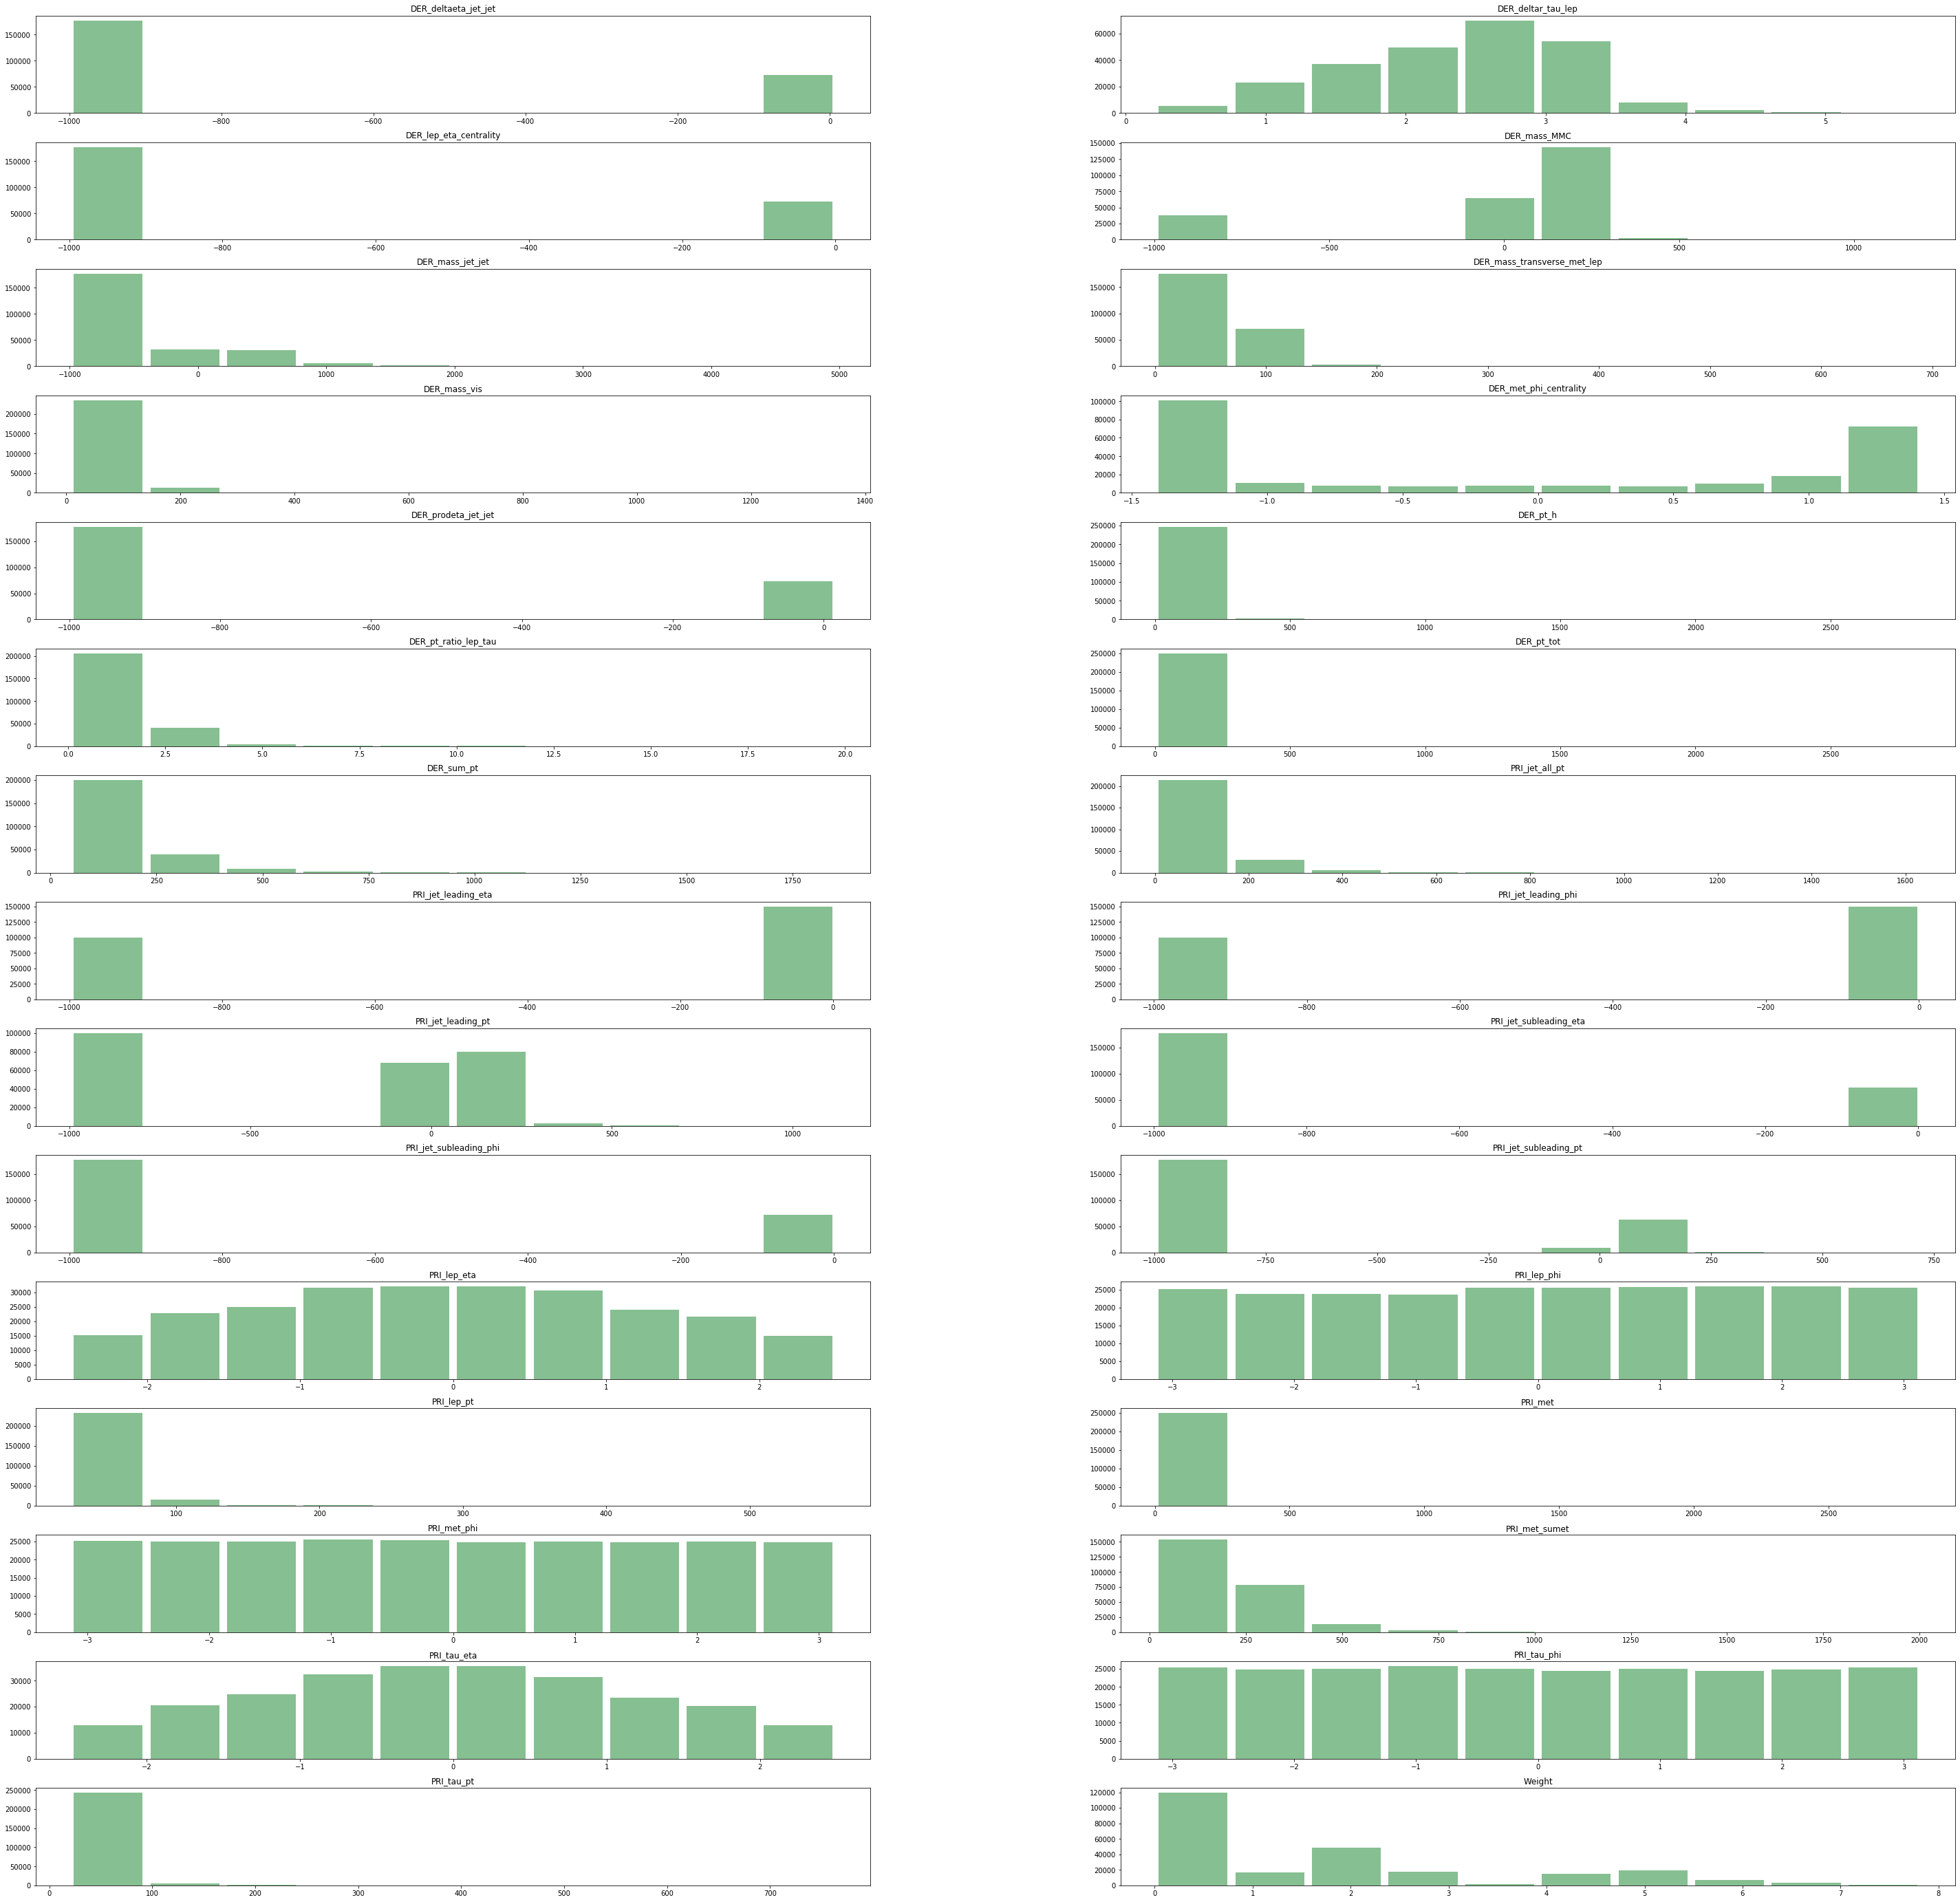

In [172]:

# selecting  30 required column
bos=boston.hist(column=req_col,bins=10, grid=False, figsize=(50,50), layout=(15,2), color='#86bf91', zorder=2, rwidth=0.9)


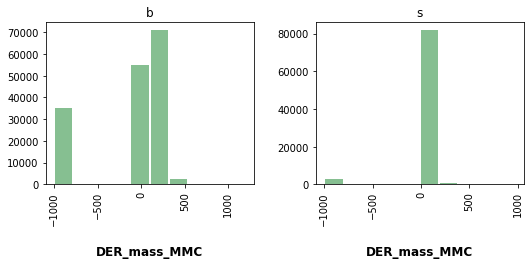

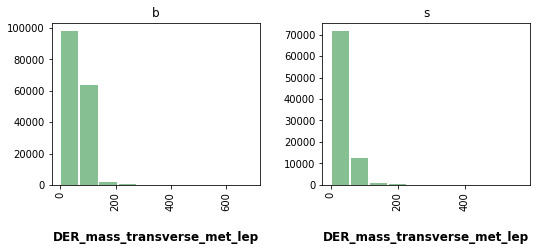

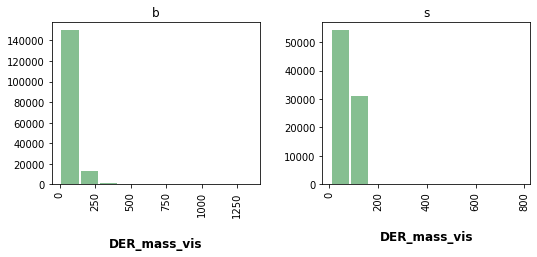

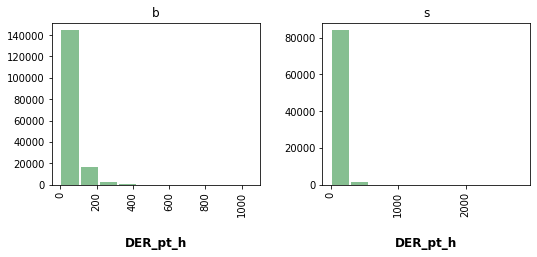

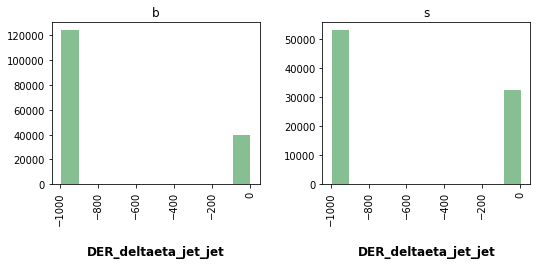

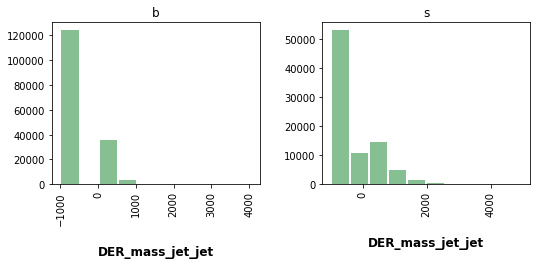

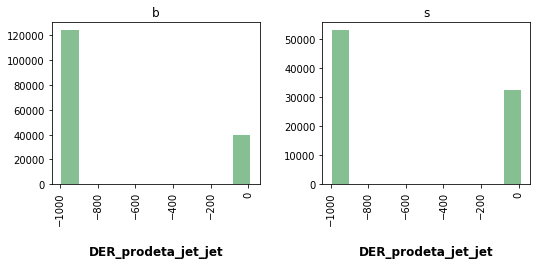

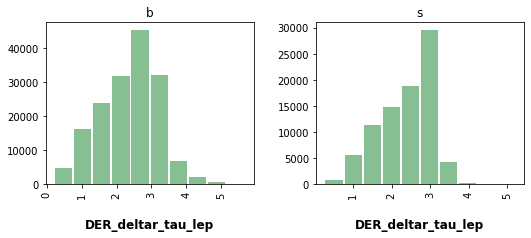

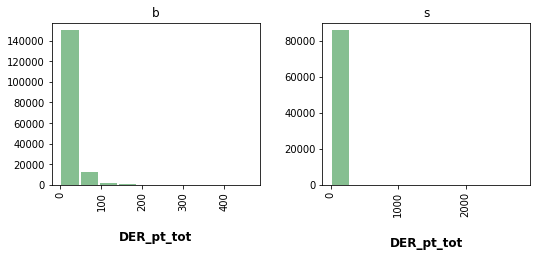

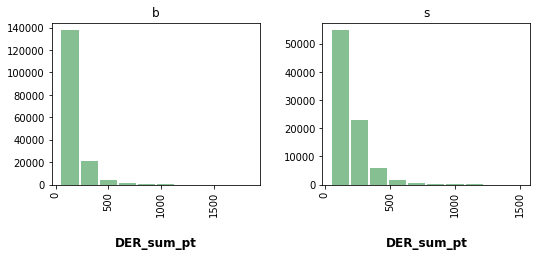

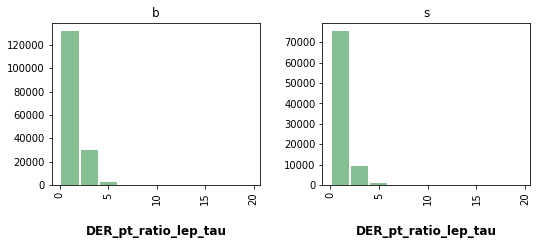

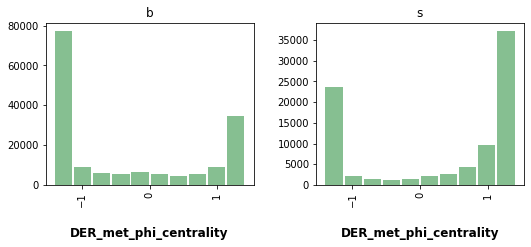

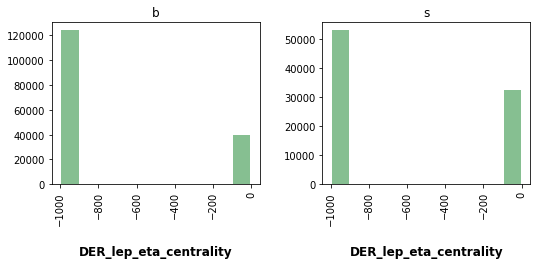

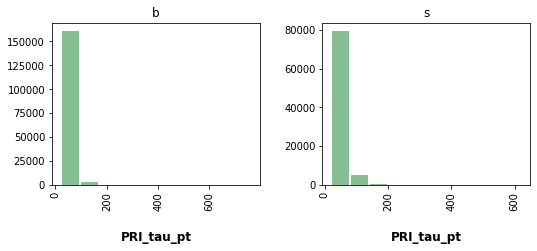

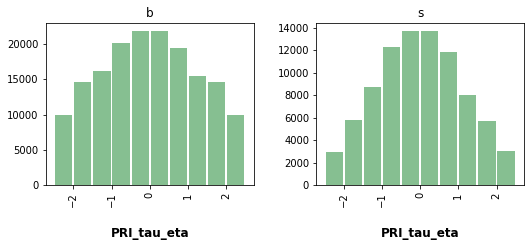

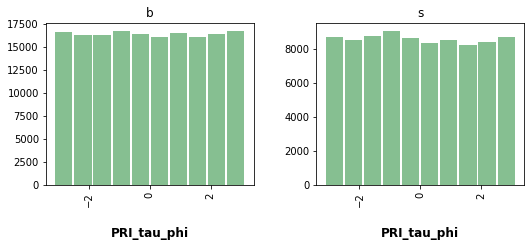

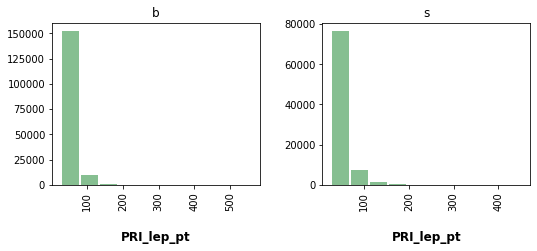

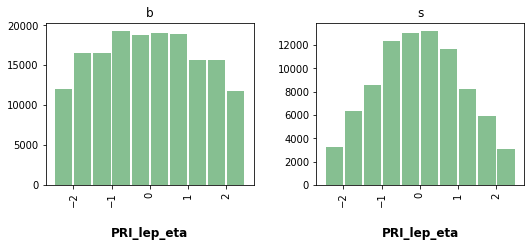

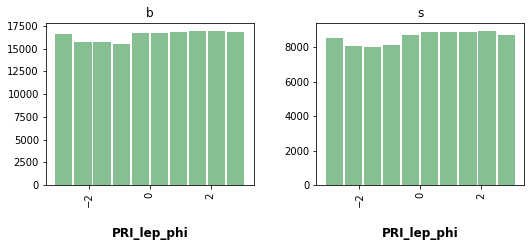

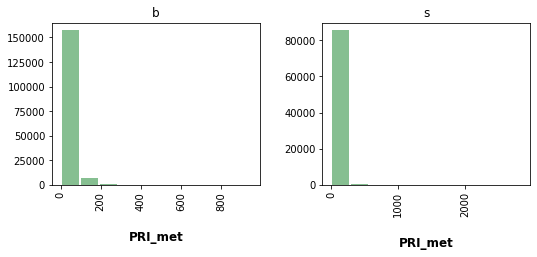

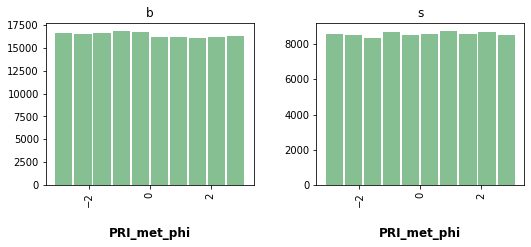

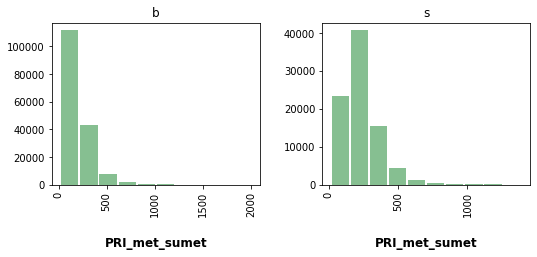

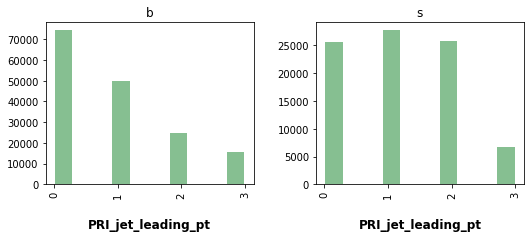

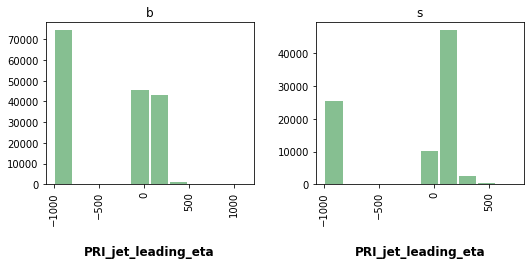

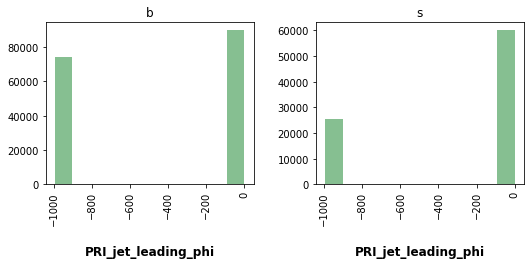

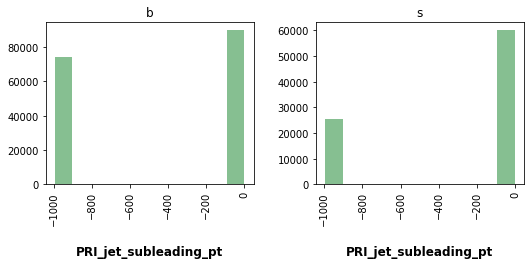

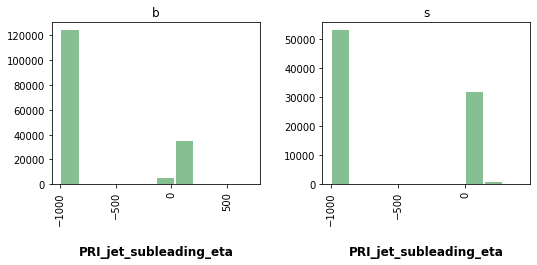

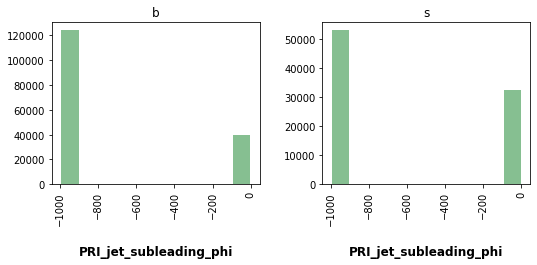

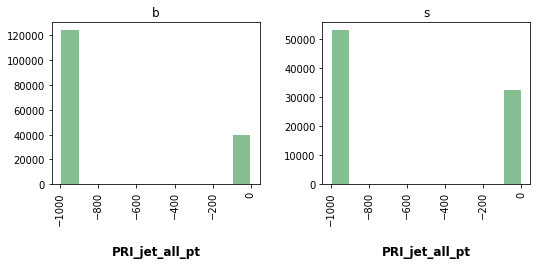

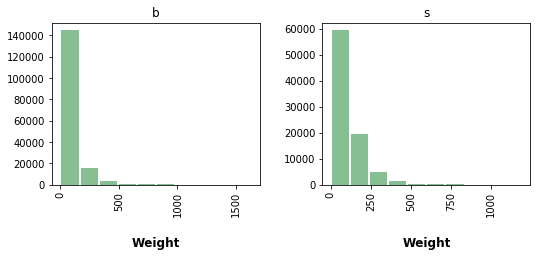

In [180]:
for i in range(len(req_col)):
    ax=boston.hist(column= boston.columns[i+1],bins=10, grid=True, by='Label',figsize=(13,3), layout=(1,3), color='#86bf91',zorder=2, rwidth=0.9)
    j=req_col[i]
    k="boston"+str(i)+".png"
    for i,x in enumerate(ax):
       # Set x-axis label
        x.set_xlabel(j, labelpad=20, weight='bold', size=12)
        fig = x.get_figure()
        fig.savefig(k)


Combination of variable will be ideal to discriminate the class.
DER_mass_MMC
DER_pt_tot
PRI_met


# Question 3

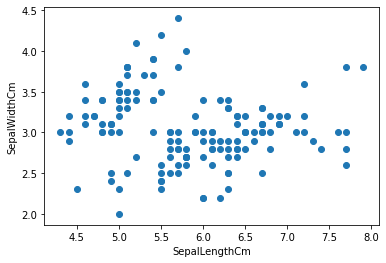

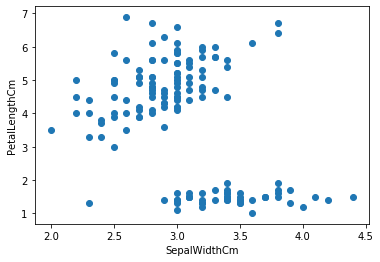

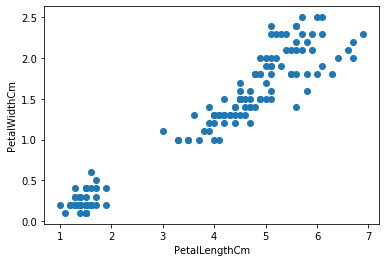

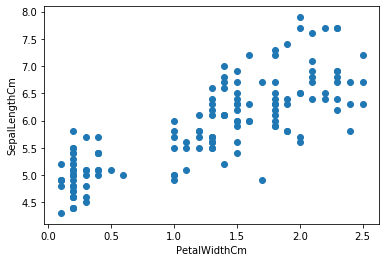

In [206]:
col=list(iris_df.columns)[1:5]

for i in range(len(col)):
    if i < 3:
        plt.scatter(x=iris_df[col[i]],y=iris_df[col[i+1]])
        plt.xlabel(col[i])
        plt.ylabel(col[i+1])
        plt.show()
    else:
        plt.scatter(x=iris_df[col[i]],y=iris_df[col[0]])
        plt.xlabel(col[i])
        plt.ylabel(col[0])
        plt.show()


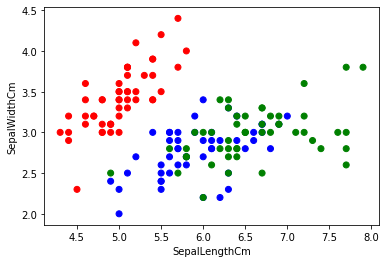

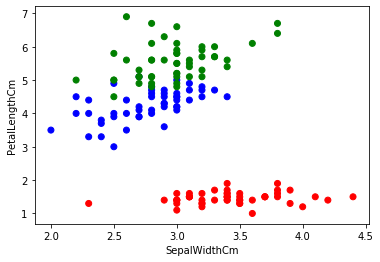

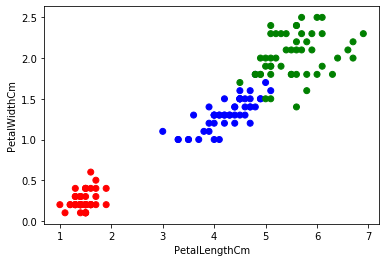

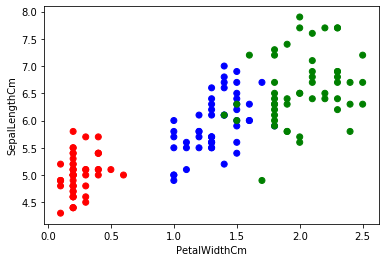

In [212]:
## plot by class

col=list(iris_df.columns)[1:5]
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
for i in range(len(col)):
    if i < 3:
        plt.scatter(x=iris_df[col[i]],y=iris_df[col[i+1]],c=iris_df['Species'].apply(lambda x: colors[x]))
        plt.xlabel(col[i])
        plt.ylabel(col[i+1])
        plt.show()
    else:
        plt.scatter(x=iris_df[col[i]],y=iris_df[col[0]],c=iris_df['Species'].apply(lambda x: colors[x]))
        plt.xlabel(col[i])
        plt.ylabel(col[0])
        plt.show()
        



Petal length and petal width shows better clarity

# Question4

I will pick PRI_met_sumet and DER_mass_transverse_met_lep since it has  exponential distribution 


In [214]:
import numpy as np
# converting the value
boston['log_value_pri'] = np.log(boston['PRI_met_sumet'])

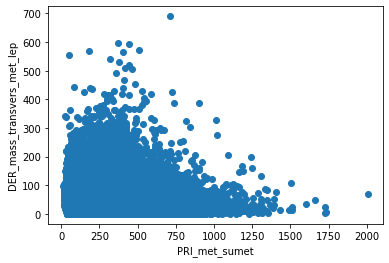

In [219]:
## before transformation

plt.scatter(x=boston['PRI_met_sumet'],y=boston['DER_mass_transverse_met_lep'])
plt.xlabel('PRI_met_sumet')
plt.ylabel('DER_mass_transvers_met_lep')
plt.show()

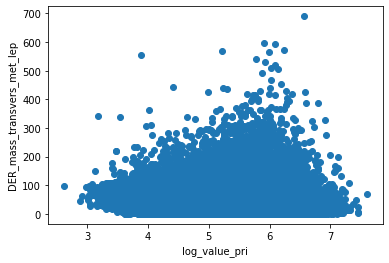

In [222]:
## After transformation

plt.scatter(x=boston['log_value_pri'],y=boston['DER_mass_transverse_met_lep'])
plt.xlabel('log_value_pri')
plt.ylabel('DER_mass_transvers_met_lep')
plt.show()

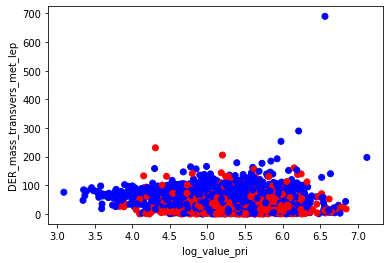

In [259]:
## After transformation

## Sampling the dataframe
from random import sample 
sample_num=sample(range(len(boston)),int(0.01*len(boston)))
sample_boston=boston.loc[sample_num]

colors = {'s':'red', 'b':'blue'}
plt.scatter(x=sample_boston['log_value_pri'],y=sample_boston['DER_mass_transverse_met_lep'],c=sample_boston['Label'].apply(lambda x: colors[x]))
plt.xlabel('log_value_pri')
plt.ylabel('DER_mass_transvers_met_lep')
plt.show()

# Question 5

In [321]:
# loading data
image=pd.read_csv("train.csv")

In [324]:
#Standardizing the variable
from sklearn.preprocessing import StandardScaler
# Separating out the features
x=image
x.drop(['label'], axis = 1) 

# Separating out the target
y = image.loc[:,['label']]

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [278]:
#getting unique value of label
n=list(image.label.unique())
n.sort()

In [295]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# reducing to 2D
pca = PCA(n_components=2)

data={}
for i in range(len(n)):
    data[i]=image[image['label']==n[i]]
    

[[-2.39624972e-17  1.76919945e-20  5.53063275e-21 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.78147627e-17  1.98899224e-19 -4.92435076e-20 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[0.1729996  0.12947573]


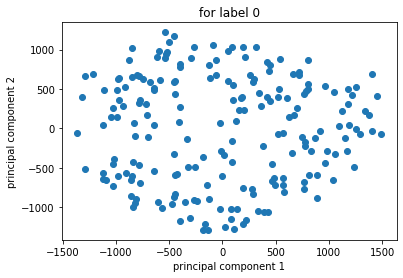

[[-1.05810038e-21 -8.79734430e-24  6.61459834e-24 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.32247737e-17  3.30606597e-19  1.10319063e-20 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[0.34945799 0.14699191]


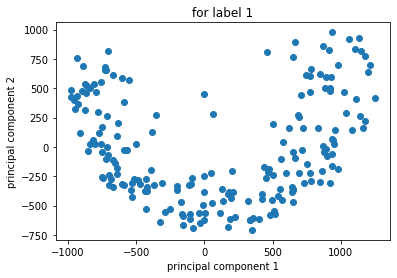

[[-4.14333467e-18 -4.95977665e-20  3.52011271e-20 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-1.13846540e-16  5.87303981e-20 -9.70903652e-19 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]
[0.12096589 0.07863936]


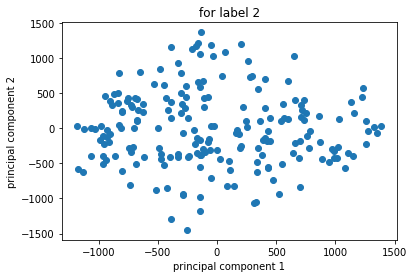

[[-5.52727967e-18 -3.52250438e-18 -2.18079763e-19 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.18975506e-16  1.55296489e-17  4.86203501e-19 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[0.12416316 0.09351624]


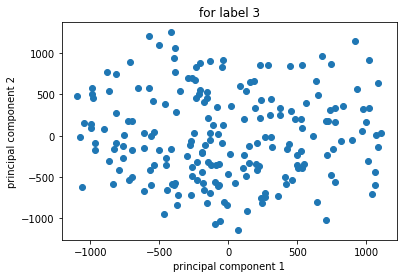

[[ 2.36853019e-17  8.13001175e-19  1.07110117e-19 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.16346755e-16 -3.22809103e-18  5.12126282e-19 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[0.11994558 0.09797721]


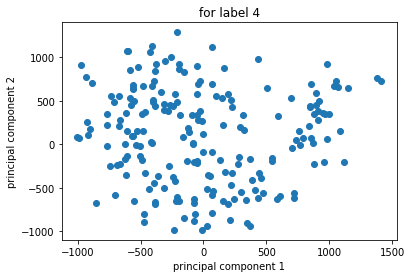

[[ 1.19198093e-18 -3.73902907e-19  4.52265714e-22 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.08633636e-17 -1.91777648e-18 -9.30684987e-20 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]
[0.16810246 0.09557852]


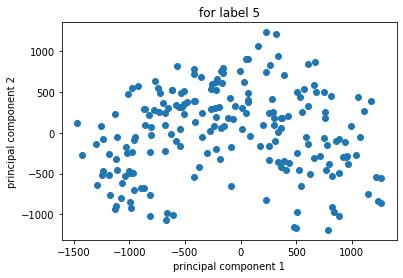

[[ 4.40426819e-19  9.81086489e-20 -2.35260766e-21 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-1.05135542e-16 -2.93827634e-17  4.52423375e-19 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[0.17153892 0.09527003]


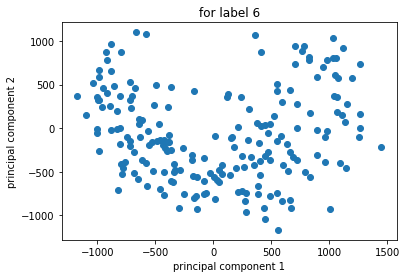

[[-8.59460846e-19 -4.60278652e-20  5.36776680e-21 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-9.31907622e-17  4.29713666e-19 -3.49563242e-20 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]
[0.15917264 0.10894223]


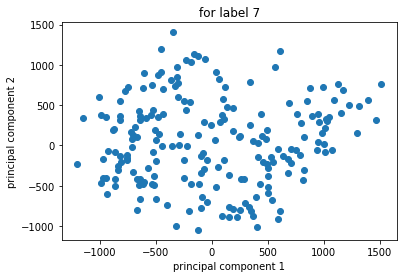

[[-9.08084250e-19 -2.73738526e-18 -4.25638292e-20 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.33281914e-17  1.21309347e-16  1.83754154e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]
[0.12304322 0.07811236]


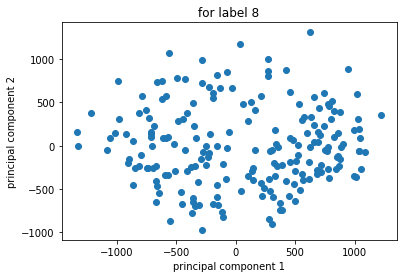

[[ 2.54925967e-17 -5.84399692e-19 -9.60280907e-22 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-1.27861127e-16  1.19179473e-17  1.58855068e-21 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[0.15800091 0.09940745]


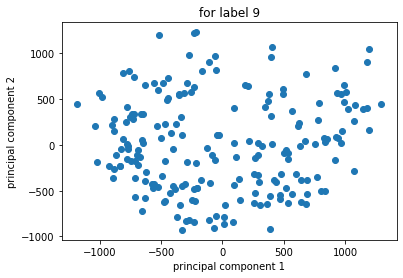

In [359]:
#sample data

for i  in range(len(n)):
    data_pca=data[i]
    data_pca.drop(['label'], axis = 1)
    standrd = StandardScaler().fit_transform(data_pca)
    pc = pca.fit_transform(data_pca)
    principalDf = pd.DataFrame(data = pc, columns = ['principal component 1', 'principal component 2'])
    principalDf['label']=i
    print(pca.explained_variance_ratio_)
    principalDf_v2=principalDf.loc[1:200]
    plt.scatter(x=principalDf_v2['principal component 1'],y=principalDf_v2['principal component 2'])
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.title("for label "+ str(i))
    plt.show()

# Question6


In [372]:
pca = PCA(n_components=30)
data_pca=image
data_pca.drop(['label'], axis = 1)
standrd = StandardScaler().fit_transform(data_pca)
pc = pca.fit_transform(data_pca)
print(pc.shape)

# Save components to a DataFrame
DIGITS_PCA_30 = pd.DataFrame(pc)

# concat the label
DIGITS_PCA_30_1 = pd.concat([ image[['label']],DIGITS_PCA_30], axis = 1)


(42000, 30)


In [652]:
data={}
for i in range(11):
    if i <10 :
        data[i]=DIGITS_PCA_30_1[DIGITS_PCA_30_1['label']==n[i]]
    else:
        data[i]=DIGITS_PCA_30_1

Df2=pd.DataFrame(columns=["predic","Accuracy","K"])
j={}
import random
from random import seed
# seed random number generator
seed(1)


for i in range(11):
    l1=range(len(data[i]))
    ck=np.array(random.sample(l1,1))
    df=pd.DataFrame(data[i])
    #centroids = df[ck,:]
    kmeans = KMeans(n_clusters=10, max_iter=10) # just run one k-Means iteration so that the centroids are not updated
    md=kmeans.fit(df)
    label = pd.DataFrame(md.labels_)

    # concat the label
    Pur_pre_data = pd.concat([ df[['label']],label], axis = 1)
    # summmarizing the data to calculate Accuracy
    Pur_pre_data['COUNTER'] =1  
    Pur_pre_data.columns=["label","predic","COUNTER"]
    entry=Pur_pre_data.groupby(["predic","label"]).count()
    entry.reset_index(inplace=True)
    ma=Pur_pre_data.groupby(["predic"]).count()
    ma.reset_index(inplace=True)
    # merging datafram
    df_merge_col = pd.merge(entry, ma, on='predic')
    # calculating Purity
    df_merge_col["Accuracy"]=df_merge_col["COUNTER_x"]/ df_merge_col["label_y"]
    j[i]=df_merge_col
    #taking mean of Purity
    df1=pd.DataFrame(df_merge_col[['predic', 'Accuracy']].groupby(['predic']).max())
    df1.reset_index(inplace=True)
    df1["K"]=i
    Df2=Df2.append(df1,ignore_index=True)
    
    




In [655]:
Df3=pd.DataFrame(Df2[["K","Accuracy"]].groupby(['K']).max())

In [657]:
Df3["Iteration"]=10
Df3["intialization method"]="algorith based"
Df3

,Accuracy,Iteration,intialization method
K,,,
0,1.000000,10,algorith based
1,1.000000,10,algorith based
2,1.000000,10,algorith based
3,1.000000,10,algorith based
4,1.000000,10,algorith based
5,1.000000,10,algorith based
6,1.000000,10,algorith based
7,1.000000,10,algorith based
8,1.000000,10,algorith based


# Question 7

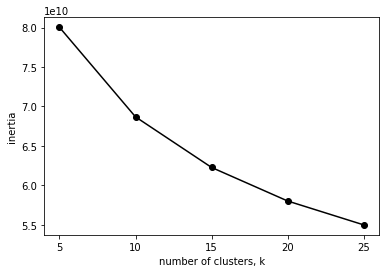

In [575]:
from sklearn.cluster import KMeans


ks = [5,10,15,20,25]
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,max_iter=100)
    
    # Fit model to samples
    md=model.fit(DIGITS_PCA_30_1.iloc[:,1:])

    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()



In [576]:

Df=pd.DataFrame(columns=["predic","Accuracy","K"])
j={}
ks = [5,10,15,20,25]
for k in range(len(ks)):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=ks[k],max_iter=100)
    
    # Fit model to samples
    md=model.fit(DIGITS_PCA_30_1.iloc[:,2:])
    # Save components to a DataFrame
    label = pd.DataFrame(md.labels_)

    # concat the label
    Pur_pre_data = pd.concat([ image[['label']],label], axis = 1)
    # summmarizing the data to calculate Accuracy
    Pur_pre_data['COUNTER'] =1  
    Pur_pre_data.columns=["label","predic","COUNTER"]
    entry=Pur_pre_data.groupby(["predic","label"]).count()
    entry.reset_index(inplace=True)
    ma=Pur_pre_data.groupby(["predic"]).count()
    ma.reset_index(inplace=True)
    # merging datafram
    df_merge_col = pd.merge(entry, ma, on='predic')
    # calculating accuracy
    df_merge_col["Accuracy"]=df_merge_col["COUNTER_x"]/ df_merge_col["label_y"]
    j[k]=df_merge_col
    #taking mean of accuracy
    df1=pd.DataFrame(df_merge_col[['predic', 'Accuracy']].groupby(['predic']).max())
    df1.reset_index(inplace=True)
    df1["K"]=ks[k]
    Df=Df.append(df1,ignore_index=True)
   

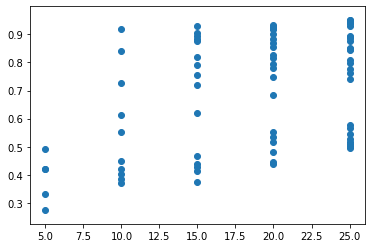

In [587]:
# plot 
plt.scatter(x=Df["K"],y=Df["Accuracy"])

In [584]:
Df.columns

Index(['index', 'predic', 'Accuracy', 'K'], dtype='object')

In [586]:
req_plt

,Accuracy
K,
5,0.388192
10,0.567337
15,0.687722
20,0.741048
25,0.757057
